In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C,D,K')
df.rename(columns={'location':'국가','date':'일자', 'total_cases_per_million':'발생률'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.03.28']
df

,국가,일자,발생률
763,Afghanistan,22.03.28,4458.393
1538,Africa,22.03.28,8374.097
2301,Albania,22.03.28,95175.176
3064,Algeria,22.03.28,5953.857
3821,Andorra,22.03.28,513392.973
...,...,...,...
168819,Wallis and Futuna,22.03.28,40923.021
169616,World,22.03.28,61247.894
170334,Yemen,22.03.28,387.102
171075,Zambia,22.03.28,16730.392


In [3]:
country_with_rank = df[['국가', '발생률']]
country_with_rank = country_with_rank.sort_values(by=['발생률'], ascending=0)
country_with_rank.head(3)

,국가,발생률
53232,Faeroe Islands,706541.904
42619,Denmark,523959.533
3821,Andorra,513392.973


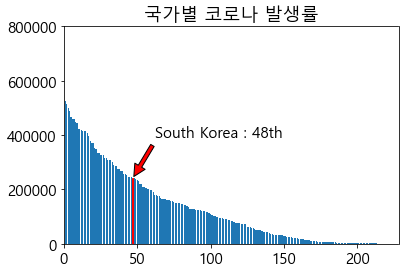

In [4]:
country_list = country_with_rank['국가'].tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank['발생률'].tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.title('국가별 코로나 발생률')
plt.axis([0, 228, 0, 800000])

korea_rank = country_list.index('South Korea')
korea_incidence_rate = country_with_rank[country_with_rank['국가'] == 'South Korea']['발생률'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1) + 'th',
            xy=(korea_rank, korea_incidence_rate),
            xytext=(korea_rank + 15, korea_incidence_rate + 150000),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()